# Présentation générale du jeu de données

Installation des différents packages :

pip install -r requirements.txt

Chargement des librairies suivantes qu'on utilisera pour l'analyse de données :

In [379]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats
import seaborn as sns
import folium
import json

import de nos données csv

In [380]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

Visualisation des 5 premières lignes de notre jeu de données

In [381]:
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Visualisation des 5 dernières lignes du jeu de données.

In [382]:
data.tail(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


Nous remarquons que la variable type_emplacement semble avoir une seule données. 

In [383]:
data.type_emplacement.unique()

array(['Arbre'], dtype=object)

Nous avons bien qu'une seule donnée pour cette variable. Nous pouvons donc la supprimer, elle n'apporte aucune information.

In [384]:
del data['type_emplacement']

Nous observons aussi qu'il y a des données en minuscule et en majuscule. Nous allons donc mettre tous nos libellés en majuscule afin que toutes nos données soient au même format. Ceci facilitera la détection d'éventuels doublons.

In [385]:
data = data.applymap(lambda s:s.upper() if type(s) == str else s)

De plus grâce à cette première visualisation, nous observons que les colonnes circonference_cm et hauteur_m, ne sont pas à la même échelle. Regardons s'il y a d'autres colonnes dans ce cas grâce à notre première visualisation et au nom des variables.

In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   domanialite          200136 non-null  object 
 2   arrondissement       200137 non-null  object 
 3   complement_addresse  30902 non-null   object 
 4   numero               0 non-null       float64
 5   lieu                 200137 non-null  object 
 6   id_emplacement       200137 non-null  object 
 7   libelle_francais     198640 non-null  object 
 8   genre                200121 non-null  object 
 9   espece               198385 non-null  object 
 10  variete              36777 non-null   object 
 11  circonference_cm     200137 non-null  int64  
 12  hauteur_m            200137 non-null  int64  
 13  stade_developpement  132932 non-null  object 
 14  remarquable          137039 non-null  float64
 15  geo_point_2d_a   

Nous pouvons voir que les seules variables qui ne sont pas à la même échelle sont circonference_cm et hauteur_m.
Nous décidons de convertir la hauteur en cm afin d'éviter d'avoir des chiffres proche de 0 pour la colonne circonference_cm.

In [387]:
data["hauteur_cm"] = data["hauteur_m"]*100
del data["hauteur_m"]

Regardons le nombre de lignes et le nombre de colonnes du jeu de données

In [388]:
data.shape

(200137, 17)

Nous avons une population de 200 137 arbres et 17 colonnes (nous en avions 18,mais nous en avons supprimée une). 

Regardons s'il y a des doublons (lignes identiques)

In [389]:
data.duplicated().sum()

0

Nous n'avons pas de doublons.

Regardons les types des colonnes et le nombre de lignes non vides

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   domanialite          200136 non-null  object 
 2   arrondissement       200137 non-null  object 
 3   complement_addresse  30902 non-null   object 
 4   numero               0 non-null       float64
 5   lieu                 200137 non-null  object 
 6   id_emplacement       200137 non-null  object 
 7   libelle_francais     198640 non-null  object 
 8   genre                200121 non-null  object 
 9   espece               198385 non-null  object 
 10  variete              36777 non-null   object 
 11  circonference_cm     200137 non-null  int64  
 12  stade_developpement  132932 non-null  object 
 13  remarquable          137039 non-null  float64
 14  geo_point_2d_a       200137 non-null  float64
 15  geo_point_2d_b   

Nous observons qu'il y a des données manquantes dans certaines variables comme complement_addresse et variete.

Regardons plus en détail les données manquantes.

Pour commencer, nous pouvons regarder par exemple les colonnes ayant plus de 80% de données manquantes.
Pour cela, nous allons créer une fonction et l'utiliser, ensuite sur notre jeu de données.

In [391]:
def del_Nan(data, seuil, delete, all_freq):
    tab = pd.isnull(data).sum()/len(data.id)
    s=tab.to_frame(name='freq').reset_index()
    if all_freq==0:
        print(s[s['freq']>=seuil])
    else:
        print(s)
    if delete==1:
        s=s[s['freq']>=seuil]
        col_del=list(s['index'])
        data=data.drop(list(s['index']), axis=1, inplace=True)
        print("Columns deleted : ", col_del)

Utilisons cette fonction avec un seuil de 80%.

In [392]:
del_Nan(data, 0.8,0,0)

                  index      freq
3   complement_addresse  0.845596
4                numero  1.000000
10              variete  0.816241


On voit que la colonne "numero" n'a pas de données. Donc on peut la supprimer.

On remarque aussi que la colonne complément d'adresse n'a que très peu de données renseignées mais, ceci parait logique. Dans la mesure où, on a les coordonnées des points, il n'est pas utile de conserver cette colonne.

Quant à la colonne variété, elle a aussi plus de 80% de données vides. Il ne semble pas très pertinent de la conserver sachant qu'on a déjà des informations sur le genre, l'espèce et le nom de l'arbre. Nous pouvons donc aussi supprimer cette colonne.

Supprimons les trois colonnes grâce à la fonction (on utilise le paramètre delete).

In [393]:
del_Nan(data, 0.8,1,0)

                  index      freq
3   complement_addresse  0.845596
4                numero  1.000000
10              variete  0.816241
Columns deleted :  ['complement_addresse', 'numero', 'variete']


Regardons plus précisément les valeurs manquantes des autres colonnes ne dépassant pas le seuil. Traçons une matrice.

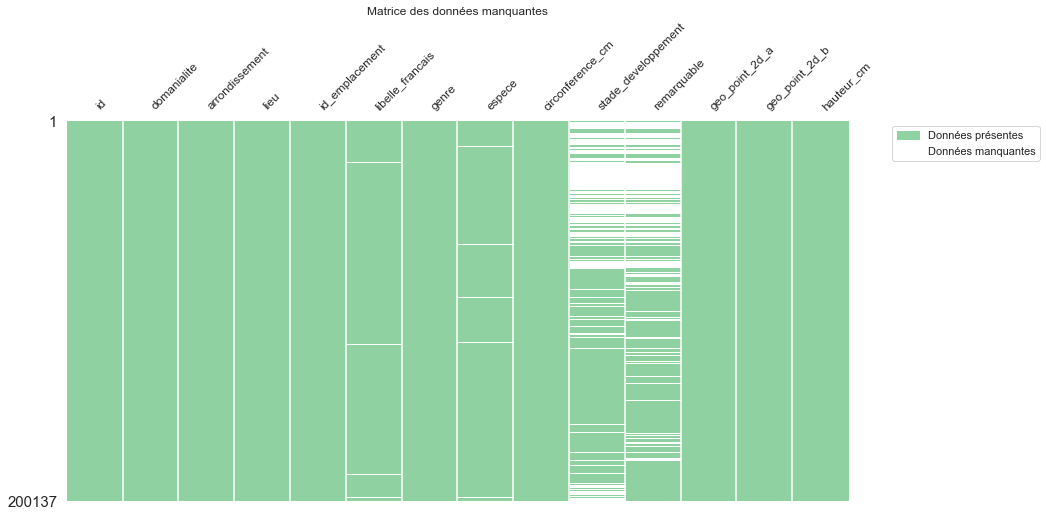

In [394]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False).set_title("Matrice des données manquantes")
gray_patch = mpatches.Patch(color=(0.564, 0.823, 0.631), label='Données présentes')
white_patch = mpatches.Patch(color='white', label='Données manquantes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', handles=[gray_patch, white_patch])

Pour information, les données en blanc représentent les données manquantes et celles en vert représente les données présentes.

Ce graphique nous permet de remarquer qu'il manque quelques données concernant la colonne "libelle_francais" qui est le nom de l'arbre, de même pour la colonne "espèce". Mais, nous avons d'autres informations sur ces données comme le genre par exemple. Nous pouvons pour l'instant conserver ces données.

Il manque aussi beaucoup de données dans les colonnes stade_developpement et remarquable.
Regardons les valeurs uniques de ces colonnes.

Commençons par la colonne "remarquable"

In [395]:
data.remarquable.unique()

array([ 0., nan,  1.])

Pour information, les arbres remarquables de France sont des arbres vivants qui sont exceptionnels
par leur âge, leurs dimensions, leur forme, leur passé ou encore leur légende

Il convient peut être de traiter différemment les arbres remarquables des autres. Si nous n'avons pas d'information, nous considérons que l'arbre n'est pas remarquable.

In [396]:
data['remarquable'].fillna(0, inplace=True)

On vérifie la correction des valeurs manquantes pour la colonne "remarquable"

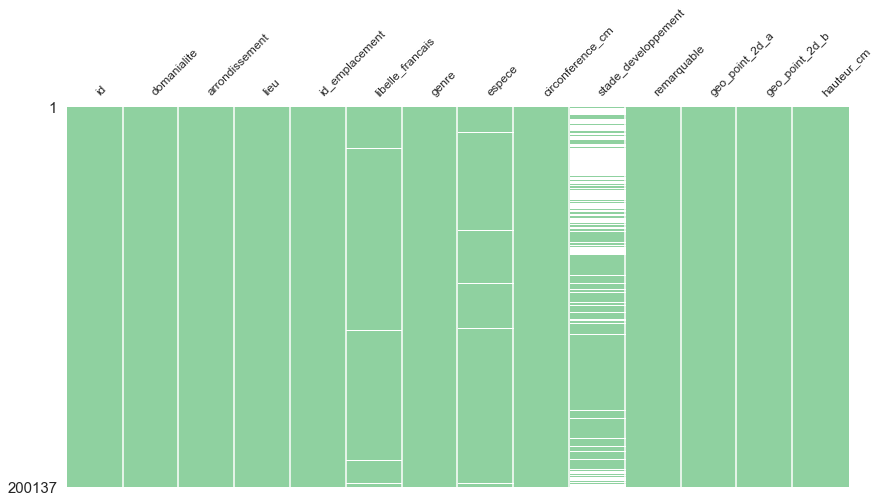

In [397]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

Regardons la colonne stade_developpement

In [398]:
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

On a les choix adulte, jeune, mature, jeune adulte.
Regardons le pourcentage total de données que nous avons dans cette colonne.

In [399]:
data.stade_developpement.describe()

count     132932
unique         4
top            A
freq       64438
Name: stade_developpement, dtype: object

Nous avons 66% environs de données dans cette colonne. Nous pouvons remplacer les données vides par "non renseigné" et conserver cette variable.

In [400]:
data['stade_developpement'].fillna("NON RENSEIGNE", inplace=True)

In [401]:
data.shape

(200137, 14)

Après avoir traités les données manquantes, il nous reste 14 colonnes.

En conclusion, nous avons appris que notre jeu de données avait 200 137 arbres et 18 colonnes au depart.
Nous avons pu traité nos données manquantes. En effet, nous avons soit supprimé ou conservé les variables en fonction des informations qu'elles apportaient à notre jeu de données. 4 colonnes ont donc été supprimées.

Nous avons pu aussi formaté notre jeu de données pour mettre toutes les données qualitatives en majuscule et mettre toutes nos données quantitatives à la même échelle.

Analysons à présent notre jeu de données en étudiant chaque variable.

# Démarche méthodologique d’analyse de données 

Maintenant que nous avons traité les doublons et les valeurs manquantes. Nous allons étudier nos variables quantitatives : circonference_cm et hauteur_cm.

## 1) Etude des variables quantitatives

Le but ici est d'étudier chaque variable afin de découvrir les informations qu'elles peuvent nous apporter et de détecter les éventuelles valeurs anodines dites "valeurs aberrantes".

### Regardons, quelles sont nos variables quantitatives ?

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   domanialite          200136 non-null  object 
 2   arrondissement       200137 non-null  object 
 3   lieu                 200137 non-null  object 
 4   id_emplacement       200137 non-null  object 
 5   libelle_francais     198640 non-null  object 
 6   genre                200121 non-null  object 
 7   espece               198385 non-null  object 
 8   circonference_cm     200137 non-null  int64  
 9   stade_developpement  200137 non-null  object 
 10  remarquable          200137 non-null  float64
 11  geo_point_2d_a       200137 non-null  float64
 12  geo_point_2d_b       200137 non-null  float64
 13  hauteur_cm           200137 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 21.4+ MB


Nous observons deux colonnes quantitatives à prendre en compte : circonference_cm et hauteur_cm.
Calculons quelques statistiques descriptives pour obtenir plus d'information sur nos deux variables.

In [403]:
data[["circonference_cm", "hauteur_cm"]].describe().round(2)

,circonference_cm,hauteur_cm
count,200137.00,200137.00
mean,83.38,1311.05
std,673.19,197121.74
min,0.00,0.00
25%,30.00,500.00
50%,70.00,800.00
75%,115.00,1200.00
max,250255.00,88181800.00


Les données semblent très dispersées pour ces deux colonnes, il convient de vérifier s'ils n'existent pas de données aberrantes. En effet, nous voyons que les maximum pour ces deux variables sont très important. 


### Commençons par analyser la variable circonference_cm.

Nous pouvons tracer un stripplot qui permet de mettre en lumière les valeurs aberrantes pour les ensembles de données volumineux.

Pour cela, on va d'abord créer une fonction.

In [404]:
def graph_stripplot(data_i,column_i, title_i):    
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(14,7))
    ax = sns.stripplot(y=column_i, data=data_i,
                       size=4, color="g").set_title(title_i)


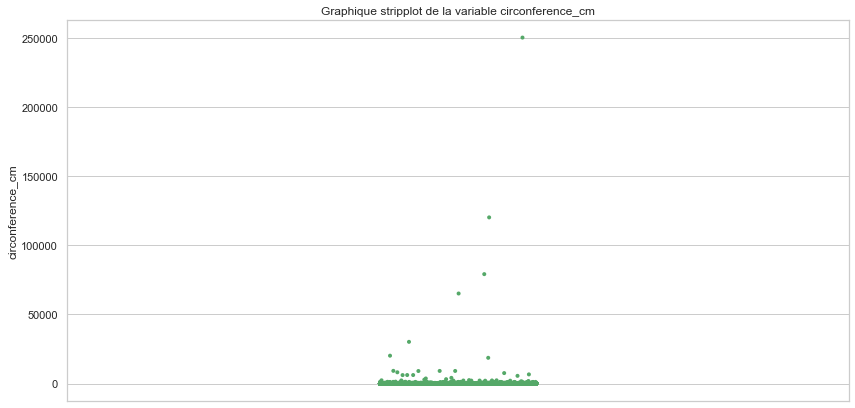

In [405]:
graph_stripplot(data,"circonference_cm", "Graphique stripplot de la variable circonference_cm")

On observe des valeurs très extrêmes, une grande partie de la population est regroupée en bas du graphique.

Si on fait une recherche sur internet, on sait que :
L'arbre avec la plus grande circonférence connue aujourd'hui à Paris est un platane d’Orient du Parc Monceau. son tronc mesure 7 mètres de circonférence pour une hauteur de 31 mètres environ.
source : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris

On peut supprimer les données supérieures à 701 cm.

In [406]:
(data["circonference_cm"] > 701).sum()

82

In [407]:
data = data.loc[data["circonference_cm"] <= 701]

Maintenant que nous avons supprimé les valeurs aberrantes proche du maximum, nous pouvons tracer un boxenplot qui permet plus de quantile calculer que la boxplot standard.

Créer une fonction pour ce graphique.

In [408]:
def graph_boxenplot(data_i, column_i, color_i,title_i):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(11,6))
    sns.boxenplot(x=column_i, 
                  color=color_i,
                  scale="linear", data=data_i)
    plt.title(title_i)

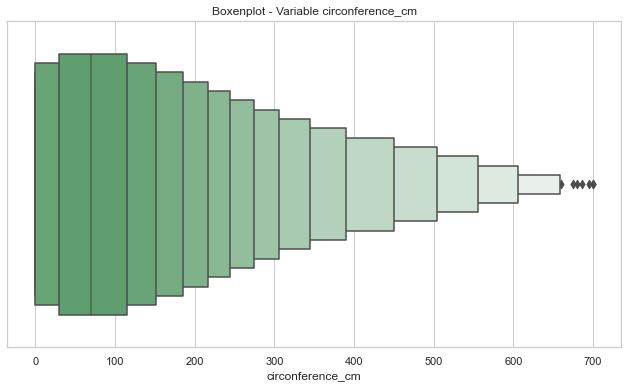

In [409]:
graph_boxenplot(data, "circonference_cm", "g","Boxenplot - Variable circonference_cm")

Nous observons encore des données qui sortent de l'ordinaire dans la limite supérieure, mais elles sont cohérentes. Nous les conservons pour ne pas perdre d'informations.

Nous observons que le minimum est 0. Ceci parait étonnant qu'un arbre ne puisse pas avoir de circonférence. 
Nous ne trouvons pas de données sur internet concernant l'arbre le plus fin à Paris.
Nous pouvons utiliser la formule de IQR pour supprimer les données dites "aberrantes".

In [410]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    print(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [411]:
outliers(data.circonference_cm)

30.0


,sub,values
0,IQR,85.000000
1,Upper Bound,242.500000
2,Lower Bound,-97.500000
3,Sum outliers,3327.000000
4,percentage outliers,1.663043


Selon la formule du IQR, on n'a pas de valeur aberrante, la limite inférieure est -97,5.
Nous allons donc simplement supprimer les données à 0 qui ne sont pas possible pour un arbre.

In [412]:
(data["circonference_cm"] <= 0).sum()

25867

In [413]:
data = data.loc[data["circonference_cm"] > 0]

Recalculons nos statistiques descriptives et retraçons le boxenplot sans les données aberrantes.

In [414]:
data["circonference_cm"].describe().round(2)

count    174188.00
mean         91.45
std          58.85
min           1.00
25%          45.00
50%          80.00
75%         122.00
max         700.00
Name: circonference_cm, dtype: float64

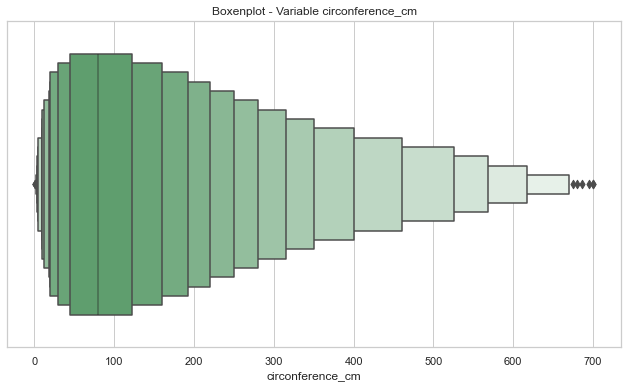

In [415]:
graph_boxenplot(data, "circonference_cm", "g","Boxenplot - Variable circonference_cm")

Nous observons que les valeurs sont peu dispersées, la boite à moustache est assez aplatie vers le bas. De plus, l'écart-type est assez faible, il est de 58.85. 
Nous apprenons aussi que 50% des arbres à Paris ont une circonference au dessus de 80 cm. Mais, nous avons beaucoup de valeurs extrêmes. 
On sait aussi que 25% des arbres ont une circonference au dessus de 122 cm.

Nous pouvons à présent vérifier si la distribution suit une loi normale grâce à un test.

Pour interpréter le test, on sait que H0 = la distribution suit une loi normale.
Donc si la p-value < 0.05, on rejette H0 et si la p-value>0.05, on ne rejette pas H0.
En d'autre terme, si la p-value < 0.05, la distribution en suit pas la loi normale et si la p-value>0.05, la distribution suit une loi normale.
Lançons le test de la loi normale.

In [416]:
scipy.stats.normaltest(data.circonference_cm)

NormaltestResult(statistic=43533.395882253986, pvalue=0.0)

On voit que la p-value<0.05, la distribution ne suit donc pas une loi normale. Le test est assez significatif car nous avons un volume important de données.
Vérifions ceci avec le tracé de l'histogramme.

Créons une fonction pour éviter les répétitions de code.

In [417]:
def graph_hist(var, bins_r, title_i,color_h, xmin,xmax, xscale, ymin, ymax, xlabel, ylabel):
    plt.figure(figsize=(11,5))
    plt.hist(var,bins=bins_r, color=color_h)
    plt.title(title_i)
    plt.xlim(xmin, xmax, xscale)
    plt.ylim(ymin,ymax)

    # Etiquetage
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

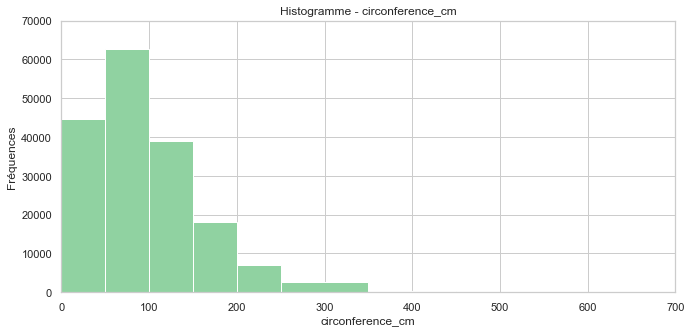

In [418]:
graph_hist(data.circonference_cm,[0,50,100,150,200,250,350,450,700], "Histogramme - circonference_cm", (0.564, 0.823, 0.631),
           0,700, 150, 0, 70000, 'circonference_cm', 'Fréquences')

On voit que la distribution est plutot regroupée sur la gauche.
Il serait judicieux de faire des intervalles afin que notre distribution soit plus pertinente. On ajoute une colonne avec un reg_circonference_cm.

In [419]:
def reg_cir(x):
    
    if x<50:
        return "1- [0-50["
    elif x>=50 and x<100:
        return "2- [50-100["
    elif x>=100 and x<150:
        return "3- [100-150["
    elif x>=150 and x<200:
        return "4- [150-200["
    elif x>=200:
        return "5- 200 et plus"



In [420]:
data['reg_circonference_cm']=data.apply(lambda row: reg_cir(row.circonference_cm), axis=1)


In [421]:
data['reg_circonference_cm'].describe()

count          174188
unique              5
top       2- [50-100[
freq            62661
Name: reg_circonference_cm, dtype: object

Regardons à présent la variable hauteur_m

In [422]:
data['reg_circonference_cm'].value_counts(normalize=True, sort=False).sort_index(ascending=True)


1- [0-50[         0.256258
2- [50-100[       0.359732
3- [100-150[      0.223976
4- [150-200[      0.103268
5- 200 et plus    0.056766
Name: reg_circonference_cm, dtype: float64

On peut à présent tracer un barplot.

Créons une fonction pour ce graphique.

In [423]:
def graph_barplot(data, title, color_i,ylim_min, ylim_max, xlabel_i, ylabel_i, rotate_i, graph_vertical):
    t = pd.crosstab(data, "freq", normalize=True)
    t = t.assign(var = t.index, freq = 100 * t.freq)
    plt.figure(figsize=(14,7))
    if graph_vertical==1:
        sns.barplot(x = "var", y = "freq", data = t, color=color_i)
        plt.ylim(ylim_min,ylim_max)
    else:
        sns.barplot(x = "freq", y = "var", data = t, color=color_i)
        plt.xlim(ylim_min,ylim_max)
    plt.title(title)
    
# Etiquetage
    plt.xlabel(xlabel_i)
    plt.ylabel(ylabel_i)
    plt.xticks(rotation=rotate_i)
        


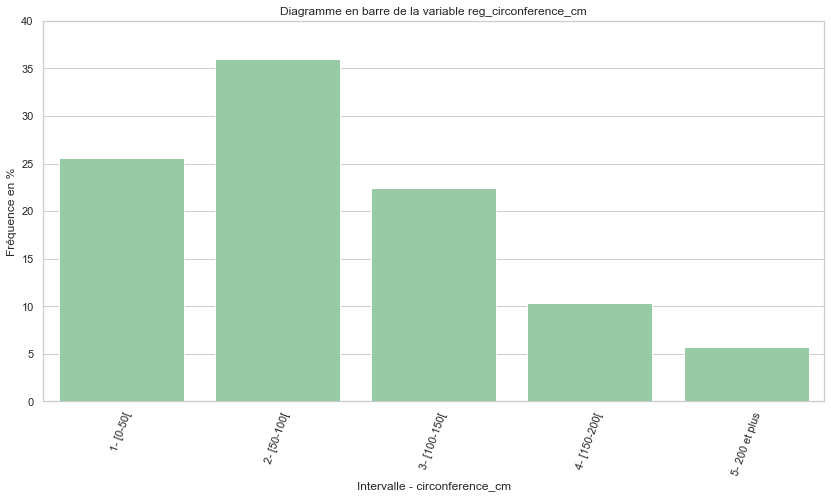

In [424]:
graph_barplot(data['reg_circonference_cm'], "Diagramme en barre de la variable reg_circonference_cm", 
              (0.564, 0.823, 0.631),
              0, 40, "Intervalle - circonference_cm", "Fréquence en %",70, 1)

Ce regroupement semble cohérent. Il est mieux répartie.

### Etudions à présent la variable hauteur_cm plus en détail

Comme pour la variable circonference_cm, nous avons observé des valeurs anodines.

Faisons un graphique violinplot qui représente la densité d'une variable. Il permet d'observer facilement les données aberrantes pour les volumes important de données.

Créons d'abord une fonction.

In [425]:
def graph_violinplot(data_col_i, title_i, ylabel_i, color_i):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14,7))
    ax = sns.violinplot(y=data_col_i, color=color_i)
    ax.set_title(title_i)
    ax.set_ylabel(ylabel_i)


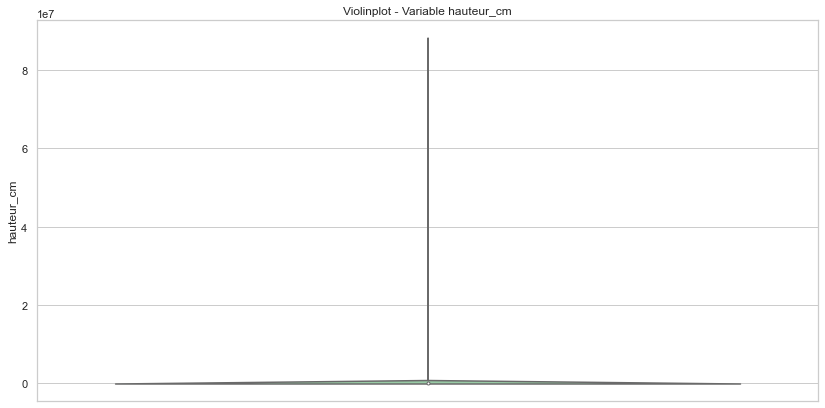

In [426]:
graph_violinplot(data["hauteur_cm"], "Violinplot - Variable hauteur_cm", "hauteur_cm", (0.564, 0.823, 0.631))

Ici encore nous observons des valeurs aberrantes.

En effet, l'arbre le plus grand connu actuellement à Paris porte le nom de Séquoia. Il se trouve aux Buttes-Chaumont et mesure 35 mètres.
source : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris

Nous pouvons supprimer les données supérieures à 40 mètres.

In [427]:
(data["hauteur_cm"] > 4000).sum()

475

In [428]:
data = data.loc[data["hauteur_cm"] <= 4000]

Recalculons à présent nos statistiques descriptives et traçons un

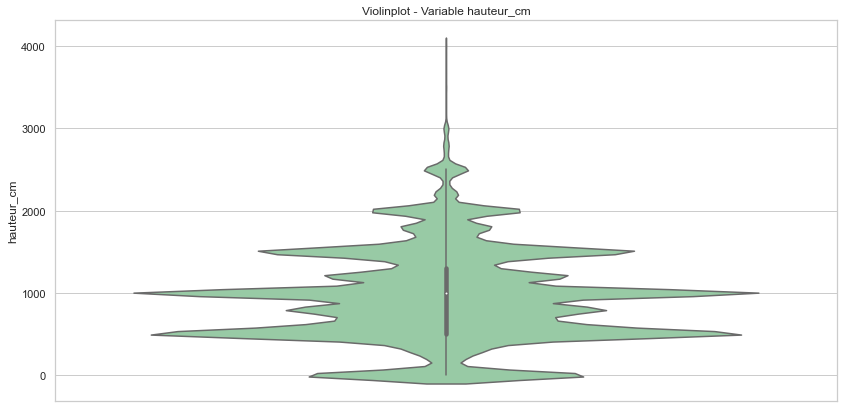

In [429]:
graph_violinplot(data["hauteur_cm"], "Violinplot - Variable hauteur_cm", "hauteur_cm", (0.564, 0.823, 0.631))

In [430]:
data["hauteur_cm"].describe().round(2)

count    173713.00
mean        954.91
std         567.60
min           0.00
25%         500.00
50%        1000.00
75%        1300.00
max        4000.00
Name: hauteur_cm, dtype: float64

Grâce au violinplot, nous observons que nous avons des valeurs aberrrantes dans la partie basse du graphique.

De plus, le minimum est 0, ce qui n'est pas possible pour un arbre.
Regardons l'IQR.

In [431]:
outliers(data.hauteur_cm)

500.0


,sub,values
0,IQR,800.00000
1,Upper Bound,2500.00000
2,Lower Bound,-700.00000
3,Sum outliers,906.00000
4,percentage outliers,0.52155


Les données dites aberrantes sont celles inférieures à -700.
Nous pouvons donc uniquement supprimer les données à 0.

In [432]:
(data["hauteur_cm"] <= 0).sum()

13717

In [433]:
data = data.loc[data["hauteur_cm"] > 0]

In [434]:
data["hauteur_cm"].describe().round(2)

count    159996.00
mean       1036.78
std         514.70
min         100.00
25%         600.00
50%        1000.00
75%        1400.00
max        4000.00
Name: hauteur_cm, dtype: float64

25 % des arbres ont une hauteur au dessus de 1400 centimètres soit 14 mètres.
L'ecart-type est de 514, les données sont peu dispersées.
Traçons à présent le boxplot.

Text(0.5, 1.0, 'Boîte à moustache - "hauteur_cm"')

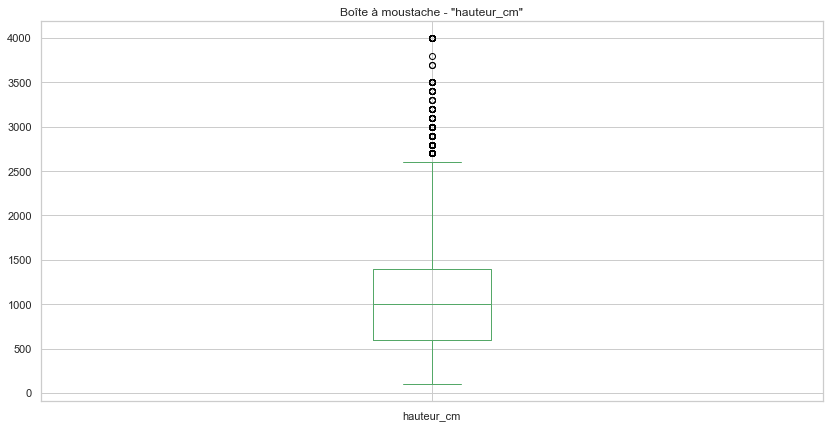

In [435]:
plt.figure(figsize=(14,7))
data.boxplot(column="hauteur_cm" , color="g").set_title('Boîte à moustache - "hauteur_cm"')

Nous pouvons donc confirmer que nos données sont peu dispersées. Même si nous avons des valeurs extrêmes.

Regardons si la distribution de cette variable suit une loi normale.

Pour rappel : pour interpréter le test, on sait que H0 = la distribution suit une loi normale. Donc si la p-value < 0.05, on rejette H0 et si la p-value>0.05, on ne rejette pas H0. En d'autre terme, si la p-value < 0.05, la distribution en suit pas la loi normale et si la p-value>0.05, la distribution suit une loi normale. Lançons le test de la loi normale.

In [436]:
scipy.stats.normaltest(data.hauteur_cm)

NormaltestResult(statistic=15866.540147621814, pvalue=0.0)

On remarque que la p-value est inférieure à 0.05, la distribution ne suit donc pas une loi normale. 
Vérifions ceci avec le tracé de l'histogramme.

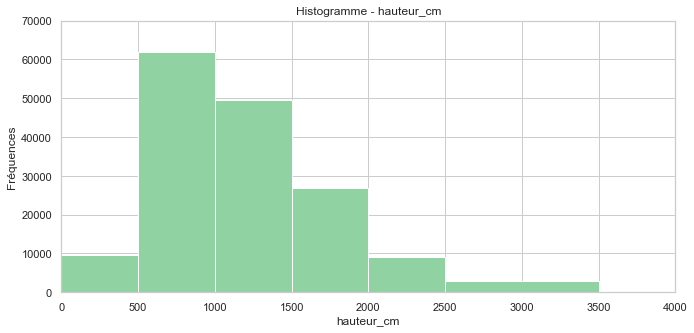

In [437]:
graph_hist(data.hauteur_cm,[0,500,1000,1500,2000,2500,3500,4000], "Histogramme - hauteur_cm", (0.564, 0.823, 0.631),
           0,4000, 150, 0, 70000, 'hauteur_cm', 'Fréquences')

Il serait judicieux de regrouper les données et de faire des intervalles afin quelles soient plus pertinentes.
Tout comme pour la variable circonference_cm, faisons un regroupement pour la variable hauteur_m. Creons une colonne Reg_hauteur_m.

In [438]:
def reg_haut(x):
    if x<1000:
        return "[0-1000["
    elif x>=1000 and x<1500:
        return "[1000-1500["
    elif x>=1500 and x<2000:
        return "[1500-2000["
    elif x>=2000:
        return "2000 et plus"


In [439]:
data['reg_hauteur_cm']=data.apply(lambda row: reg_haut(row.hauteur_cm), axis=1)

Regardons les proportions pour la nouvelle colonne.

In [440]:
data['reg_hauteur_cm'].value_counts(normalize=True)

[0-1000[        0.446330
[1000-1500[     0.309714
[1500-2000[     0.167985
2000 et plus    0.075971
Name: reg_hauteur_cm, dtype: float64

Ce regroupement semble convenable

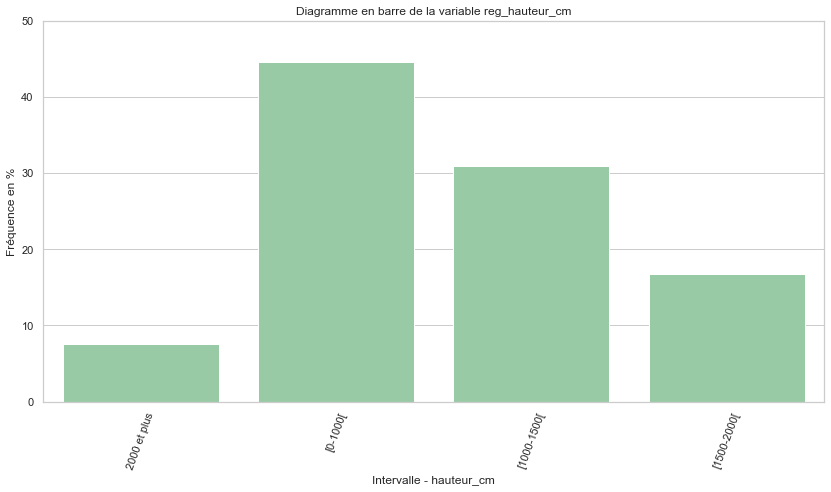

In [441]:
graph_barplot(data['reg_hauteur_cm'], "Diagramme en barre de la variable reg_hauteur_cm", 
              (0.564, 0.823, 0.631),
              0, 50, "Intervalle - hauteur_cm", "Fréquence en %",70, 1)

### Conclusion de l'étude sur les variables quantitatives

Nous avons pu détecter beaucoup de valeurs aberrantes que ce soit pour la variable circonference_cm que pour la variable "hauteur_cm". 
Grâce au information sur les arbres de Paris que nous avons pu trouver sur le web, nous avons pu nettoyer nos données en supprimant les données dite "aberrantes". Nous aurions pu utiliser l'écart-interquartile, mais il était moins pertinent, que ce soit sur les valeurs hautes ou sur les valeurs très basses.

Nos deux distributions ont une forme assez similaire, elles sont asymétriques. En effet, les données sont regroupées vers la gauche.
Nous avons donc pu les regrouper en intervalle afin que les données soient plus pertinentes et mieux distribuées.

Etudions à présent nos données qualitatives.

## 2) Analyses des variables qualitatives

Quelles sont nos variables qualitatives ?

In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159996 entries, 0 to 198878
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    159996 non-null  int64  
 1   domanialite           159995 non-null  object 
 2   arrondissement        159996 non-null  object 
 3   lieu                  159996 non-null  object 
 4   id_emplacement        159996 non-null  object 
 5   libelle_francais      158639 non-null  object 
 6   genre                 159996 non-null  object 
 7   espece                158789 non-null  object 
 8   circonference_cm      159996 non-null  int64  
 9   stade_developpement   159996 non-null  object 
 10  remarquable           159996 non-null  float64
 11  geo_point_2d_a        159996 non-null  float64
 12  geo_point_2d_b        159996 non-null  float64
 13  hauteur_cm            159996 non-null  int64  
 14  reg_circonference_cm  159996 non-null  object 
 15  

Regardons les statistiques sur les variables qualitatives.

In [443]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,159995,159996,159996,158639,159996,158789,159996.00
unique,9,25,5451,169,146,376,NaN
top,ALIGNEMENT,PARIS 16E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,PLATANE,PLATANUS,X HISPANICA,NaN
freq,99568,15005,1629,39181,39259,33917,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,0.03
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


Nous allons transformer la variable "remarquable" qui prend comme valeur 0/1 en oui/non.

In [444]:
data['remarquable'] = data['remarquable'].replace(0,'NON')
data['remarquable'] = data['remarquable'].replace(1,'OUI')

In [445]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,159995,159996,159996,158639,159996,158789,159996
unique,9,25,5451,169,146,376,2
top,ALIGNEMENT,PARIS 16E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,PLATANE,PLATANUS,X HISPANICA,NON
freq,99568,15005,1629,39181,39259,33917,159815


Nous pouvons observer que le mode de la variable espece est X_hispanica.
Etudions chaque variable.

Commençons par la domanialite, nous avons 9 catégories et la valeur la plus représentée est alignement.

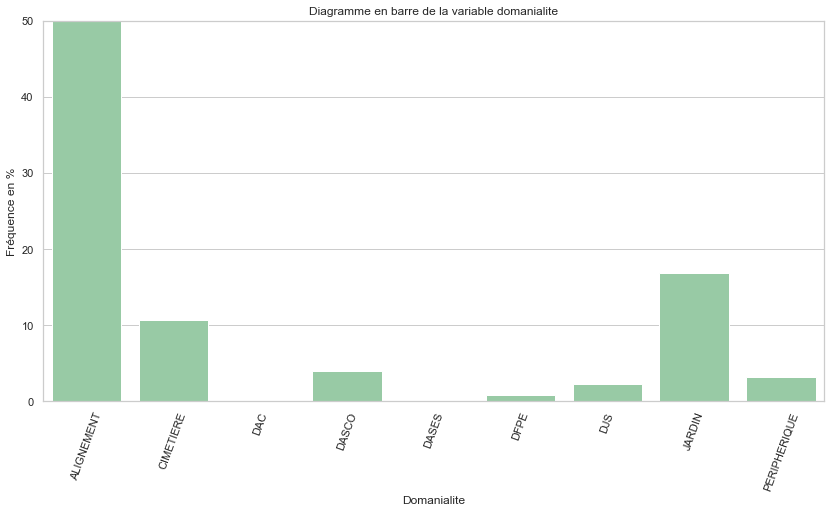

In [446]:
graph_barplot(data['domanialite'], "Diagramme en barre de la variable domanialite", 
              (0.564, 0.823, 0.631),
              0, 50, "Domanialite", "Fréquence en %",70,1)


Plus de 50% des arbres se trouve dans un alignement.
un peu plus de 20% se trouve dans des jardins et un peu moins de 20% dans des cimetières.
Les autres catégories sont très peu représentées. Il serait peut être judicieux de les regrouper dans une catégorie "Autres".

In [447]:
data["domanialite"].value_counts(normalize=True)

ALIGNEMENT      0.622319
JARDIN          0.168262
CIMETIERE       0.106353
DASCO           0.039795
PERIPHERIQUE    0.032220
DJS             0.022963
DFPE            0.007931
DAC             0.000131
DASES           0.000025
Name: domanialite, dtype: float64

In [448]:
replace_values = {'ALIGNEMENT':'ALIGNEMENT', 'JARDIN':'JARDIN','CIMETIERE':'CIMETIERE', 'DASCO' : 'AUTRES', 
                  'PERIPHERIQUE' : 'AUTRES', 'DJS' : 'AUTRES', 'DFPE': 'AUTRES', 'DAC':'AUTRES', 'DASES':'AUTRES' }  

In [449]:
data['domanialite'] = data['domanialite'].map(replace_values)     

Recalculons les fréquences en % par catégorie de notre variable.

In [450]:
data_dom=data["domanialite"].value_counts(normalize=True).reset_index(name="values")

In [451]:
data_dom['values'] =data_dom['values']*100

In [452]:
data_dom

,index,values
0,ALIGNEMENT,62.231945
1,JARDIN,16.826151
2,CIMETIERE,10.635332
3,AUTRES,10.306572


Nous remarquons que la répartition a l'air correct. Traçons un bubbleplot.

Pour cela nous allons créer une fonction.

In [453]:
def graph_bubbleplot(data_i, x_i, y_i, s_i, color_i,xlabel_i, ylabel_i, title_i, ylim_min, ylim_max,
                    color_text, align, fontweight_i):
    plt.figure(figsize=(11,5))
    sns.scatterplot(data=data_i, x=x_i, y=y_i, s=100*s_i, color=color_i).margins(0.4)
    plt.xlabel(xlabel_i)
    plt.ylabel(ylabel_i)
    plt.title(title_i)
    plt.ylim(ylim_min,ylim_max)
    for i,txt in enumerate(s_i):
        plt.text(i,txt, str(round(txt,2))+" %", color=color_text, ha=align, fontweight=fontweight_i, size=12)

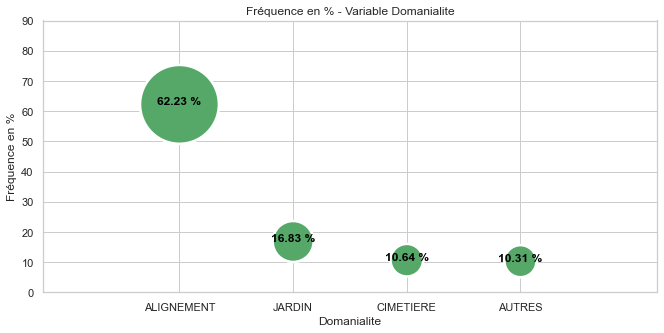

In [454]:
graph_bubbleplot(data_dom, 'index', 'values', data_dom['values'],'g',"Domanialite", "Fréquence en %", 
                 "Fréquence en % - Variable Domanialite", 0, 90,
                    "black", "center", "bold")

Nous remarquons que 62% des arbres à Paris ont une domanialité qui vaut "Alignement". Les autres catégories sont assez équilibrées.

### Regardons à présent la variable Lieu.
Elle comporte beaucoup de catégorie au total 5 451. Le mode représente seulement 1 629 arbres, ce qui est très peu.

Vérifions si les données sont dispersées dans les différentes catégories. 

In [455]:
data["lieu"].value_counts(normalize=True).head(5)

PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE    0.010182
PARC DES BUTTES CHAUMONT                       0.009606
INSEP / AVENUE DU TREMBLAY                     0.008075
JARDIN DU CHAMP DE MARS                        0.007944
AVENUE DES CHAMPS ELYSEES                      0.007769
Name: lieu, dtype: float64

In [456]:
min(data["lieu"].value_counts(normalize=True))

6.250156253906348e-06

Les données sont très dispersées dans les différentes catégories. Nous disposons des coordonnées geographique. Il n'est donc pas pertinent de conserver cette variable.

In [457]:
del data["lieu"]

### Passons à l'étude de la variable "Arrondissement"

Cette variable comporte 25 catégories. Le mode est PARIS 16E ARRDT. Ceci indique qu'il y a beaucoup d'arbre dans le 16ème arrondissement.
Vérifions ceci grâce à un diagramme en bar.

In [458]:
data["arrondissement"].value_counts(normalize=True)

PARIS 16E ARRDT      0.093784
PARIS 13E ARRDT      0.084815
PARIS 20E ARRDT      0.080633
PARIS 12E ARRDT      0.075502
PARIS 15E ARRDT      0.071389
PARIS 14E ARRDT      0.070833
PARIS 19E ARRDT      0.064289
PARIS 17E ARRDT      0.054095
PARIS 7E ARRDT       0.052645
PARIS 18E ARRDT      0.052589
BOIS DE VINCENNES    0.050551
PARIS 8E ARRDT       0.043970
PARIS 11E ARRDT      0.034270
SEINE-SAINT-DENIS    0.033401
VAL-DE-MARNE         0.023944
BOIS DE BOULOGNE     0.020488
PARIS 10E ARRDT      0.019400
PARIS 4E ARRDT       0.016788
PARIS 5E ARRDT       0.014113
PARIS 6E ARRDT       0.010869
PARIS 1ER ARRDT      0.008338
PARIS 3E ARRDT       0.007500
PARIS 9E ARRDT       0.006869
HAUTS-DE-SEINE       0.005588
PARIS 2E ARRDT       0.003338
Name: arrondissement, dtype: float64

Nous pouvons commencer par supprimer "ARRDT" dans le texte des données. En effet, nous savons que les chiffres représentent l'arrondissement de Paris. Ceci permettra à notre graphique d'être plus lisible.

In [459]:
data['arrondissement'] = data['arrondissement'].str.replace('ARRDT','')

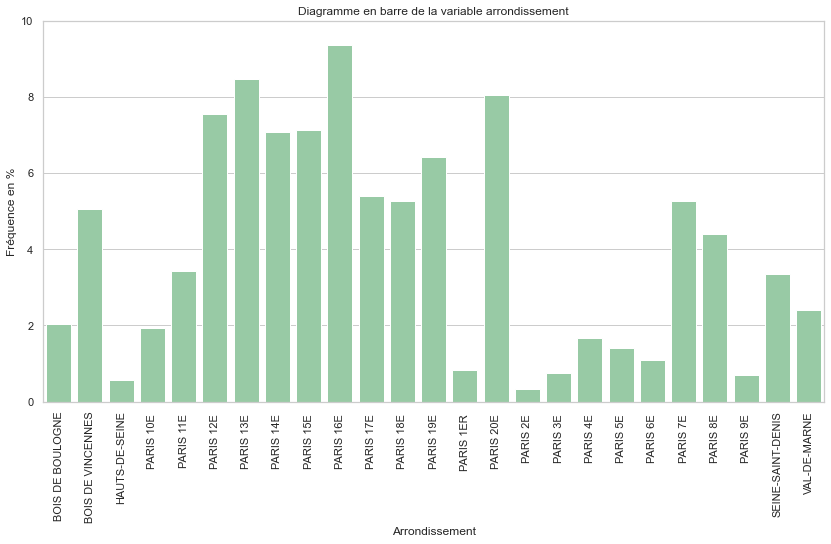

In [315]:
graph_barplot(data['arrondissement'], "Diagramme en barre de la variable arrondissement", 
              (0.564, 0.823, 0.631),
              0, 10, "Arrondissement", "Fréquence en %",90,1)

Nous observons des arbres qui ne se trouvent pas dans un arrondissement de Paris. Nous les conservons dans la mesure où ce jeu de données a été récupéré sur le site de Paris.

Il y a beaucoup plus d'arbre dans le 16eme arrondissemments de Paris (+8%)
Mais nous observons aussi que 24% des arbres se trouvent dans les arrondissements 16, 13 et 20.
Et il y a très peu d'arbre dans le 2ème arrondissement moins de 1%.
En conclusion, les arbres sont assez dispersées dans les arrondissements.

### Regardons à présent la variable "libelle_francais" qui représente le nom des arbres au sein de notre jeu de données.

Nous avons ici beaucoup de catégories 169.
Etudions la dispersion des données.

In [316]:
data["libelle_francais"].value_counts(normalize=True)

PLATANE        0.246982
MARRONNIER     0.143502
TILLEUL        0.109796
ERABLE         0.078348
SOPHORA        0.065734
                 ...   
GRENADIER      0.000006
RAISINIER      0.000006
CALLISTEMON    0.000006
CORDYLINE      0.000006
PISTACHIER     0.000006
Name: libelle_francais, Length: 169, dtype: float64

In [317]:
data["libelle_francais"].value_counts(normalize=True).head(20)

PLATANE                 0.246982
MARRONNIER              0.143502
TILLEUL                 0.109796
ERABLE                  0.078348
SOPHORA                 0.065734
FRÊNE                   0.021811
MICOCOULIER             0.020588
PEUPLIER                0.017909
NOISETIER DE BYZANCE    0.017366
CHÊNE                   0.017240
PIN                     0.017114
POIRIER À FLEURS        0.015936
CHARME                  0.014914
CERISIER À FLEURS       0.014568
ROBINIER                0.012179
ORME                    0.009764
IF                      0.008340
BOULEAU                 0.008138
PAULOWNIA               0.007552
FAUX-CYPRÈS             0.007022
Name: libelle_francais, dtype: float64

On observe plusieurs sauts dont un entre ribinier et Orme.
nous pouvons regrouper les catégories qui représentent moins d'un pourcent des arbres.

In [318]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [319]:
info_lib.value_counts(normalize=True)

False    0.911243
True     0.088757
Name: libelle_francais, dtype: float64

90% des catégories représentent moins de 1% des arbres.
Les données sont très dispersées.
On peut faire un regroupement Autres

In [320]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)

In [321]:
info_lib=list(info_lib.loc[info_lib== True].index)

In [322]:
def map_lib(lib):
    if lib in info_lib:
        return lib
    else:
        return "AUTRES"

In [323]:
data["libelle_francais"]=data["libelle_francais"].map(map_lib, na_action=None)

Recalculons nos fréquences en poucentage pour chaque catégorie.

In [324]:
data["libelle_francais"].value_counts(normalize=True)

PLATANE                 0.244887
AUTRES                  0.192917
MARRONNIER              0.142285
TILLEUL                 0.108865
ERABLE                  0.077683
SOPHORA                 0.065177
FRÊNE                   0.021626
MICOCOULIER             0.020413
PEUPLIER                0.017757
NOISETIER DE BYZANCE    0.017219
CHÊNE                   0.017094
PIN                     0.016969
POIRIER À FLEURS        0.015800
CHARME                  0.014788
CERISIER À FLEURS       0.014444
ROBINIER                0.012075
Name: libelle_francais, dtype: float64

In [325]:
data["libelle_francais"].describe(include='all')

count      159996
unique         16
top       PLATANE
freq        39181
Name: libelle_francais, dtype: object

Nous avons à présent 16 catégories. 
Créons une fonction pour réaliser un diagramme circulaire

In [326]:
def graph_circle(data, column, title):
    t = pd.crosstab(data, "freq", normalize=True)
    t = t.assign(column = t.index, freq = 100 * t.freq)
    plt.figure(figsize=(18,8))
    plt.pie(t.freq, labels = t.column,  autopct='%.0f%%')

    plt.title(title)
    my_circle = plt.Circle((0,0), 0.4, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)

Réalisons un diagramme circulaire représentant nos données de la variable libelle_francais.

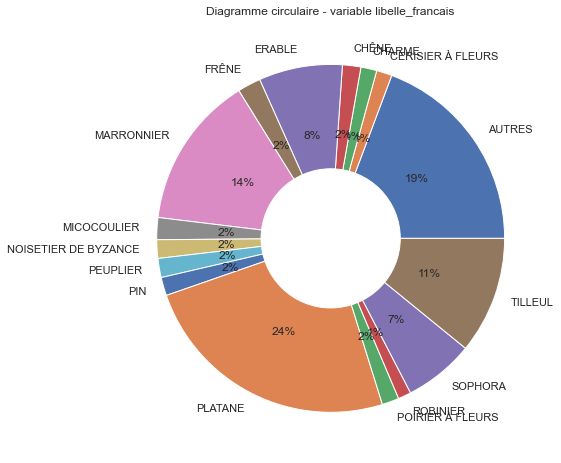

In [327]:
graph_circle(data["libelle_francais"], "libelle_francais", "Diagramme circulaire - variable libelle_francais")

on conserve 16 catégories.
A paris, il y a majoritairement des platanes, des marronniers et des tilleuls. Mais on a 19% des arbres qui sont assez diversifiés.

### Etudions la variable genre

Tout comme la variable "libelle_francais", nous avons beaucoup de catégories : 146. Il convient de faire un  regroupement.

In [460]:
data["genre"].value_counts(normalize=True).head(20)

PLATANUS     0.245375
AESCULUS     0.143116
TILIA        0.110365
ACER         0.078177
SOPHORA      0.065302
PRUNUS       0.031482
FRAXINUS     0.025488
CELTIS       0.020876
PYRUS        0.018763
POPULUS      0.017982
CORYLUS      0.017625
QUERCUS      0.017188
PINUS        0.017050
CARPINUS     0.014932
ROBINIA      0.012150
ULMUS        0.010082
MALUS        0.009931
TAXUS        0.008406
BETULA       0.008144
PAULOWNIA    0.007500
Name: genre, dtype: float64

In [461]:
info_g=(data["genre"].value_counts(normalize=True)>0.01)

In [462]:
info_g.value_counts(normalize=True)

False    0.890411
True     0.109589
Name: genre, dtype: float64

In [463]:
def map_lib(lib):
    if lib in info_g:
        return lib
    else:
        return "AUTRES"
    
info_g=(data["genre"].value_counts(normalize=True)>0.01)
info_g=list(info_g.loc[info_g== True].index)
data["genre"]=data["genre"].map(map_lib, na_action=None)

In [464]:
data["genre"].describe()

count       159996
unique          17
top       PLATANUS
freq         39259
Name: genre, dtype: object

In [465]:
data["genre"].value_counts(normalize=True)

PLATANUS    0.245375
AUTRES      0.154048
AESCULUS    0.143116
TILIA       0.110365
ACER        0.078177
SOPHORA     0.065302
PRUNUS      0.031482
FRAXINUS    0.025488
CELTIS      0.020876
PYRUS       0.018763
POPULUS     0.017982
CORYLUS     0.017625
QUERCUS     0.017188
PINUS       0.017050
CARPINUS    0.014932
ROBINIA     0.012150
ULMUS       0.010082
Name: genre, dtype: float64

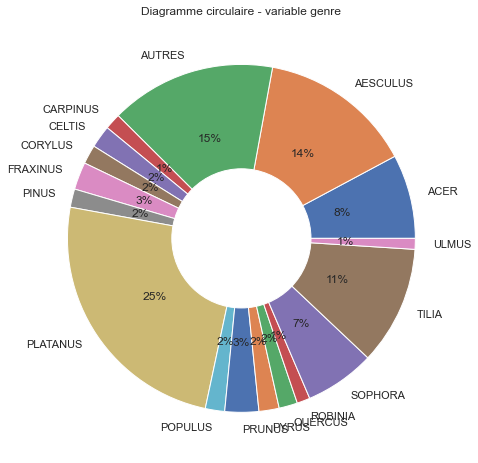

In [466]:
graph_circle(data["genre"], "genre", "Diagramme circulaire - variable genre")

L'analyse des genre est cohérente avec celle des noms des arbres. En effet, le genre d'arbre le plus répandu est "platanus".
Les deux variables apportent la même information. Il faudrait surement en conserver une seule car elles doivent être corrélées à 1. A vérifier lors de l'analyse bivariée.

### Passons à l'analyse de la variable espèce

Etudions la variable espèce, elle aussi comporte beaucoup de catégories 376.

In [467]:
data["espece"].value_counts(normalize=True).head(25)

X HISPANICA       0.213598
HIPPOCASTANUM     0.113264
JAPONICA          0.065691
TOMENTOSA         0.051408
N. SP.            0.050425
PLATANOIDES       0.029530
PSEUDOPLATANUS    0.028522
X CARNEA          0.025581
X EUROPAEA        0.022804
NIGRA             0.022457
AUSTRALIS         0.020461
OCCIDENTALIS      0.020373
CORDATA           0.019164
COLURNA           0.017407
EXCELSIOR         0.016015
CALLERYANA        0.015058
BETULUS           0.014988
ORIENTALIS        0.013049
PSEUDOACACIA      0.012142
PLATYPHYLLOS      0.010725
SERRULATA         0.009062
BACCATA           0.008344
CAMPESTRE         0.007186
ALBA              0.006657
SINENSIS          0.005939
Name: espece, dtype: float64

21 %  de nos arbres sont des x hispanica. Mais beaucoup de nos données représentent moins de 1% de notre population. Faisons un regroupement autres.

In [336]:
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e.value_counts(normalize=True)

False    0.946809
True     0.053191
Name: espece, dtype: float64

In [337]:
def map_lib_e(lib):
    if lib in info_e:
        return lib
    else:
        return "AUTRES"
    
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e=list(info_e.loc[info_e== True].index)
data["espece"]=data["espece"].map(map_lib_e, na_action=None)

In [338]:
data['espece'].describe()

count     159996
unique        21
top       AUTRES
freq       35718
Name: espece, dtype: object

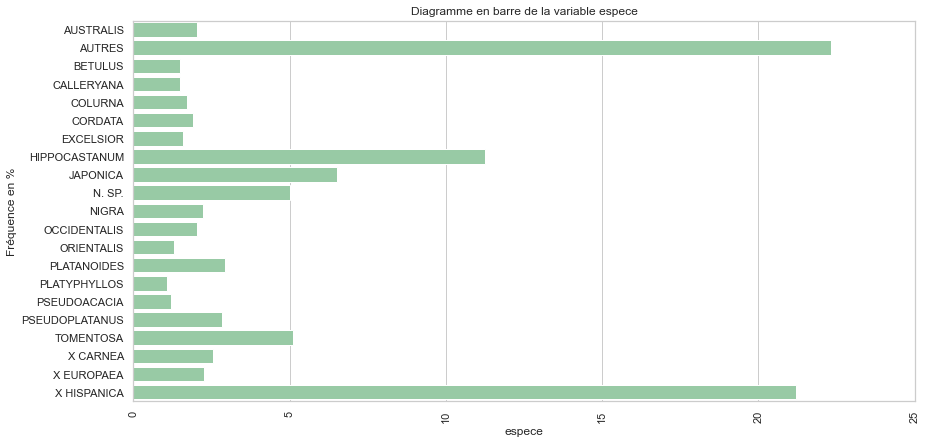

In [339]:
graph_barplot(data['espece'], "Diagramme en barre de la variable espece", 
              (0.564, 0.823, 0.631),
              0, 25, "espece", "Fréquence en %",90, 0)

Plus de 20% des arbres appartiennent à l'espèce x hispanica dont les arbres platanes font partie. La variable espèce est donc surement fortement corrélée avec les variables libellle_français et genre. Tout comme nous l'avons précisément précédement il convient de conserver une des 3 variables car elles apportent toute la même information. Il faudrait vérifier cette hypothèse avec l'analyse multivariée.

De plus, nous remarquons aussi qu'il y a beaucoup d'espèces diversifiés à Paris. La partie Autres représente plus de 20% des espèces.

### Etudions à présent la variable Remarquable qui ne comporte que deux catégories

Regardons les effectifs de chaque catégorie. Pour cela, nous créeons une fonction pour tracer une diagramme circulaire.

In [340]:
data["remarquable"].value_counts(normalize=True)

NON    0.998869
OUI    0.001131
Name: remarquable, dtype: float64

In [341]:
def graph_pie(data, column, title, colors_i):
    t = pd.crosstab(data, "freq", normalize=True)
    t = t.assign(column = t.index, freq = 100 * t.freq)
    color_palette_list = colors_i
    plt.figure(figsize=(18,8))
    plt.pie(t.freq, labels = t.column,  autopct='%.2f%%', colors=color_palette_list)
    plt.title(title)
    

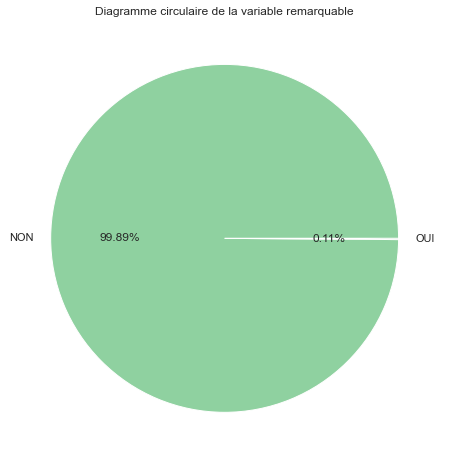

In [342]:
graph_pie(data["remarquable"], "remarquable", "Diagramme circulaire de la variable remarquable",['#8FD1A0', '#46A964'])

Il y a très peu d'arbres remarquable à Paris.

Etudions la variable stade_developpement qui comportent 4 catégories.  

In [343]:
data["stade_developpement"].isnull().sum()

0

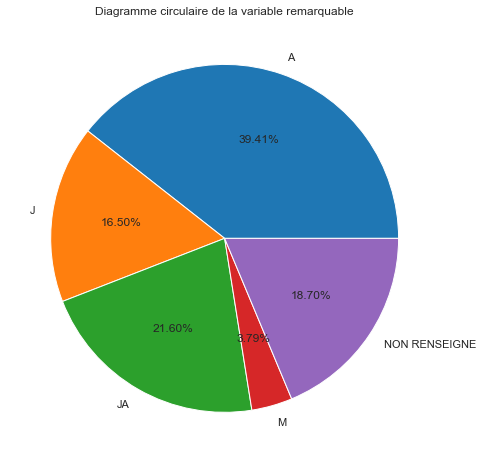

In [344]:
graph_pie(data["stade_developpement"], "stade_developpement", "Diagramme circulaire de la variable remarquable",
          ['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'])

In [345]:
data["stade_developpement"].value_counts(normalize=True)

A                0.394097
JA               0.215987
NON RENSEIGNE    0.187011
J                0.164967
M                0.037938
Name: stade_developpement, dtype: float64

On a presque la moitié d'arbre qui sont adultes à Paris. Mais on a très peu d'arbre mature.
Il faut tout de même noter que 18% des données ne sont pas renseignées. il faut donc prendre en compte ces résultats avec prudence.

### Conclusion de l'analyse sur les variables qualitatives

Nous avons remarqué que les données étaient assez dispersées au sein des variables qualitatives.
C'est pour cela, que nous avons crée un regroupement "AUTRES". Ceci nous permettra d'expliquer au mieux la diversification des espèces d'arbres qui se trouvent à Paris.

Nous avons aussi découvert que les variables espèces, genre et libelle_français apportaient surement la même information. Il faudrait donc en garder qu'une seule. Nous vérifierons cette hypothèse lors de l'analyse multivariée.

Concrètement, nous appris que la majorité des arbres étaient des Platanes, mais qu'il y a quand même une grande diversification des espèces.
On sait aussi que la plupart des arbres sont adultes et qu'il existe très peu d'arbre mature. Ces informations sont surement à prendre en compte pour optimiser les tournées pour entretenir les arbres.

Il convient à présent de visualiser nos données sur une carte afin de voir si nous pouvons en apprendre plus sur notre jeu de données. Nous pourrions par exemple, savoir si certains genres d'arbres sont regroupées au sud ou nord, par exemple.

## 3) Visualisation des données sur la carte de Paris

Le but étant d'obtenir une information supplémentaire sur la manière dont nos données sont réparties.

Commençons par tracer une carte vide de Paris.

In [346]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

In [347]:
paris

Dans notre jeu de données, nous savons dans quel arrondissement se trouve les arbres. Nous pouvons par exemple illustrer le nombre d'arbres que nous avons par arrondissement.

Pour cela, nous pouvons récupérer les données geographiques des arrondissements qui se trouve sur le site de Paris.
source : https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar&location=13,48.85156,2.32327

In [354]:
geo = json.load(open("arrondissements.geojson"))

In [355]:
len(geo["features"])

20

Nous retrouvons bien nos 20 arrondissements dans notre jeu de données.
Nous décidons de supprimer les données des autres départements afin de reprsenter les arbres de Paris uniquement.

In [357]:
data = data.loc[data['arrondissement']!='VAL-DE-MARNE']
data = data.loc[data['arrondissement']!='SEINE-SAINT-DENIS']
data = data.loc[data['arrondissement']!='HAUTS-DE-SEINE']
data = data.loc[data['arrondissement']!='BOIS DE BOULOGNE']
data = data.loc[data['arrondissement']!='BOIS DE VINCENNES']

In [ ]:
data['arrondissement'].unique()

Transformer notre variable en entier afin d'avoir uniquement des chiffres pour pouvoir matcher cette colonne avec celles des données géographiques que nous avons récupéré.

In [361]:
data['arrondissement_num'] = data['arrondissement']
data['arrondissement_num'] = data['arrondissement_num'].str.replace('PARIS','')
data['arrondissement_num'] = data['arrondissement_num'].str.replace('ER', '')
data['arrondissement_num'] = data['arrondissement_num'].str.replace('E', '')
data['arrondissement_num'] = data['arrondissement_num'].str.replace(' ', '')


In [362]:
data['arrondissement_num'].unique()

array(['7', '16', '4', '13', '12', '19', '14', '15', '3', '6', '17', '20',
       '11', '18', '1', '2', '5', '9', '10', '8'], dtype=object)

In [363]:
data['arrondissement_num']=pd.to_numeric(data['arrondissement_num'])

In [366]:
data_counts = data.groupby('arrondissement_num').size().reset_index(name='counts')
data_counts

,arrondissement_num,counts
0,1,1334
1,2,534
2,3,1200
3,4,2686
4,5,2258
5,6,1739
6,7,8423
7,8,7035
8,9,1099
9,10,3104


In [369]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data_counts, columns = ["arrondissement_num", "counts"],
                 fill_color = "YlOrRd").add_to(paris)
paris

Nous remarquons grâce à cette visualisation que la plupart des arbres se trouvent dans les "forêts" : le Bois de boulogne et le Bois de vincennes.
De plus, nous observons surtout un nombre important d'arbres dans la grande couronne et très peu, au centre de Paris.

Regardons à présent où se trouve les arbres les plus haut.

In [370]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data, columns = ["arrondissement_num", "hauteur_cm"],
                 fill_color = "YlOrRd").add_to(paris)
paris

Nous remarquons que les arbres les plus haut se trouve au nord-ouest de Paris.

Il serait intéressant de savoir aussi où se trouve les arbres les plus "gros".

In [372]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = data, columns = ["arrondissement_num", "circonference_cm"],
                 fill_color = "YlOrRd").add_to(paris)
paris

Nous remarquons que les arbres les plus "gros" se trouvent au nord-ouest, tout comme les arbres les plus haut.
Les variables 'hauteur_cm' et "circonference_cm" sont peut-être liées. Il sera intéressant de vérifier cela grâce à une analyse bivariée.

Regardons maintenant où se regroupe les genres d'arbre les plus représentés. Nous sélectionnerons les 3 premiers.

In [374]:
data_genre = data.groupby(['genre', 'arrondissement_num']).size().reset_index(name='counts')
data_genre

,genre,arrondissement_num,counts
0,ACER,1,49
1,ACER,2,45
2,ACER,3,20
3,ACER,4,51
4,ACER,5,74
...,...,...,...
320,ULMUS,16,77
321,ULMUS,17,93
322,ULMUS,18,131
323,ULMUS,19,102


Grâce à l'analyse précédente, nous avons appris qu'une majorité des arbres étaient regroupées dans certaines catégories.
Regardons ces statistiques.

In [375]:
data['genre'].value_counts(normalize=True)

PLATANUS    0.263869
AUTRES      0.148808
AESCULUS    0.137153
TILIA       0.107382
SOPHORA     0.073073
ACER        0.070337
PRUNUS      0.030138
FRAXINUS    0.026306
CELTIS      0.022957
PYRUS       0.020973
POPULUS     0.018050
PINUS       0.015971
CORYLUS     0.014643
CARPINUS    0.014376
ROBINIA     0.013034
QUERCUS     0.011865
ULMUS       0.011064
Name: genre, dtype: float64

Illustrons les 4 premières catégories sur une carte.

In [376]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
info_plat = data_genre[data_genre['genre']=='PLATANUS']
info_autres = data_genre[data_genre['genre']=='AUTRES']
info_aes = data_genre[data_genre['genre']=='AESCULUS']
info_til = data_genre[data_genre['genre']=='TILIA']


In [377]:
m = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

choropleth = folium.Choropleth(
    geo_data=geo,
    data=info_plat,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="YlGn",
    name="PLATANUS",
    show=False,
).add_to(m)

choropleth2 = folium.Choropleth(
    geo_data=geo,
    data=info_autres,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="PuRd",
    name="AUTRES",
    show=False,
).add_to(m)

choropleth3 = folium.Choropleth(
    geo_data=geo,
    data=info_aes,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="YlOrRd",
    name="AESCULUS",
    show=False,
).add_to(m)

choropleth4 = folium.Choropleth(
    geo_data=geo,
    data=info_til,
    columns = ["arrondissement_num", "counts"],
    key_on = "feature.properties.c_ar",
    fill_color="BuPu",
    name="TILIA",
    show=False,
).add_to(m)

# The underlying GeoJson and StepColormap objects are reachable
print(type(choropleth.geojson))
print(type(choropleth.color_scale))

folium.LayerControl(collapsed=False).add_to(m)

m

<class 'folium.features.GeoJson'>
<class 'branca.colormap.StepColormap'>


Nous observons que les arbres ayant un genre "platanus" sont surtout situés au nord-ouest et dans les forêts.
Nous remarquons aussi que les arbres sont très diversifiés au sud de Paris, même si on retrouve en majorité des "TILIA".

Nous apprenons aussi qu'au bois de boulogne, il y a une majorité d'arbre de type "AESCULUS".

### Conclusion de la visualisation cartographiques de nos données

Grâce à la representation graphique de nos données, nous avons aussi découvert que la majorité des arbres se trouvaient dans la grande couronne de Paris. En effet, on a remarqué qu'il avaient très peu d'arbre au centre.

De plus, nous avons appris que les arbres les plus grand et les plus gros étaient situés au nord-ouest de Paris. Il serait donc intéressant d'étudier s'il existe un lien entre la position géographique, la hauteur et la circonference des arbres.

Nous avons observé qu'au nord-ouest, nous avions en majorité des arbres de type "platanus" et qu'au sud, les arbres étaient très diversifiés, même s'il y a beaucoup plus d'arbre de type "Tilia".

# Synthèse de l’analyse de données

Grâce à notre étude, nous avons pu en apprendre beaucoup plus sur nos données. 
Nous savons que notre jeu de données contient 200 137 individus et 18 colonnes.

Avant de commencer notre analyse, il a fallu étudier les données manquantes et les traiter. Par exemple, nous avons conservé la variable "remarquable" en modifiant les données manquantes à 0 car celle-ci indiquait les arbres qui étaient exceptionnels ou non. Mais nous avons supprimé la variable "variété" qui contenaient beaucoup de valeurs manquantes et qui n'apportaient aucune information supplémentaire.

Ensuite, nous avons étudié chaque variable en commençant par les variables quantitatives. 
Nous avons découvert beaucoup de données aberrantes que nous avons pu facilement traiter en réalisant une recherche sur internet. 
Nous avons aussi appris que les données des deux varibles n'étaient pas très dispersées et que leur distribution avait une forme asymétrique (vers la gauche).
De manière plus générale, nous savons à présent que 50 % des arbres de notre population ont une taille de plus de 1 000 cm (en hauteur) et ont une circonférence d'au moins 80cm.

Nous avons alors étudier nos variables qualitatives. Les arbres étaient très dispersées dans les différentes catégories des variables. Il a fallu créer des regroupements "Autres". 
Nous nous sommes rendus compte que 3 de nos variables apportaient surement la même information : "Espèce", "libelle_français" et "genre". Il faudra vérifier cette hypothèse lors de l'analyse multivariée afin de conserver le cas échéant, une seule des 3 variables.
Grâce à cette étude nous savons que les types d'arbres à Paris sont assez diversifiés et qu'il y a peu d'arbres remarquables. Et ils sont plus nombreux dans le 16ème arrondissement (9%).

Pour finir, nous avons aussi découvert un lien potentiel entre les variables hauteur_cm, circonference_cm et le lieu géographique à l'aide de la visualisation cartographique. Nous devrons aussi confirmer cela lors de l'analyse multivariée.
Nous savons à présent que les arbres les plus gros et les plus grand se trouvent au nord-ouest, qu'il existe une grande diversité d'arbre dans le sud de Paris et qu'il y a très peu d'abre au centre de Paris.

Lors des prochaines étapes, il faudra réaliser une analyse bivariée et multivariée afin de détecter les éventuels liens entre nos variables.
Nous pourrions par exemple regarder les corrélations grâce à des nuages de point pour commencer et faire des tests statistiques par la suite.
Voici un exemple :

Text(0.5, 1.0, 'Nuage de point des liens entre les variables quantitatives')

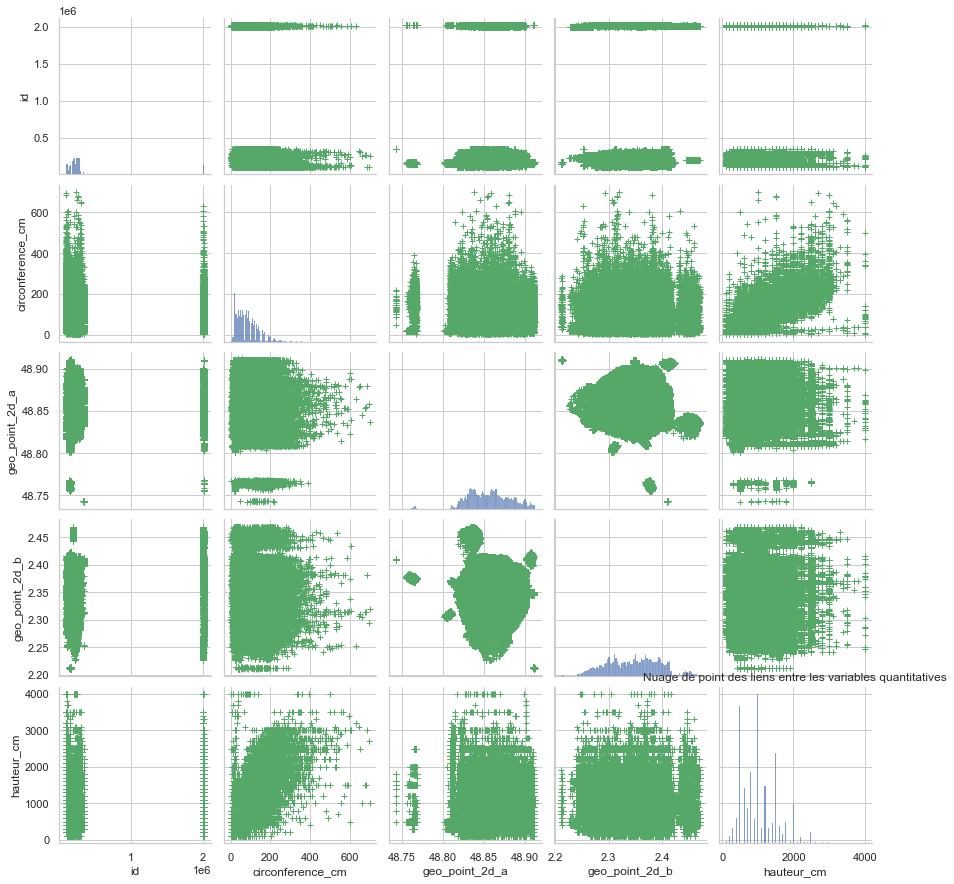

In [479]:

sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1, color="g"))
plt.title("Nuage de point des liens entre les variables quantitatives")

La hauteur et la circonférence des arbres semble liées : 
Plus un arbre est fin et plus il est haut. Plus un arbre est gros et plus il est haut.
Ceci confirme un peu plus notre hypothèse lors de l'analyse univariée.

On peut aussi observer la carte de paris avec le croisement des points geo a et b.
Vérifions cela en calculant le coefficient de Pearson.

In [624]:
scipy.stats.stats.pearsonr(data['circonference_cm'], data['hauteur_cm'])

(0.8014523238163935, 0.0)

In [ ]:

np.corrcoef(data['circonference_cm'], data['hauteur_cm'])[0, 1]

Le coefficient de Person vaut 0.80 et la p-value est inférieure au seuil de 5%. Donc le résultat est significatif. Nos deux variables sont donc très fortement corrélées linéairement et positivement

Et pour vérifier le lien entre nos variables quantitatives et qualitatives, nous pouvons retracer un pairplot et aggréger par genre par exemple.

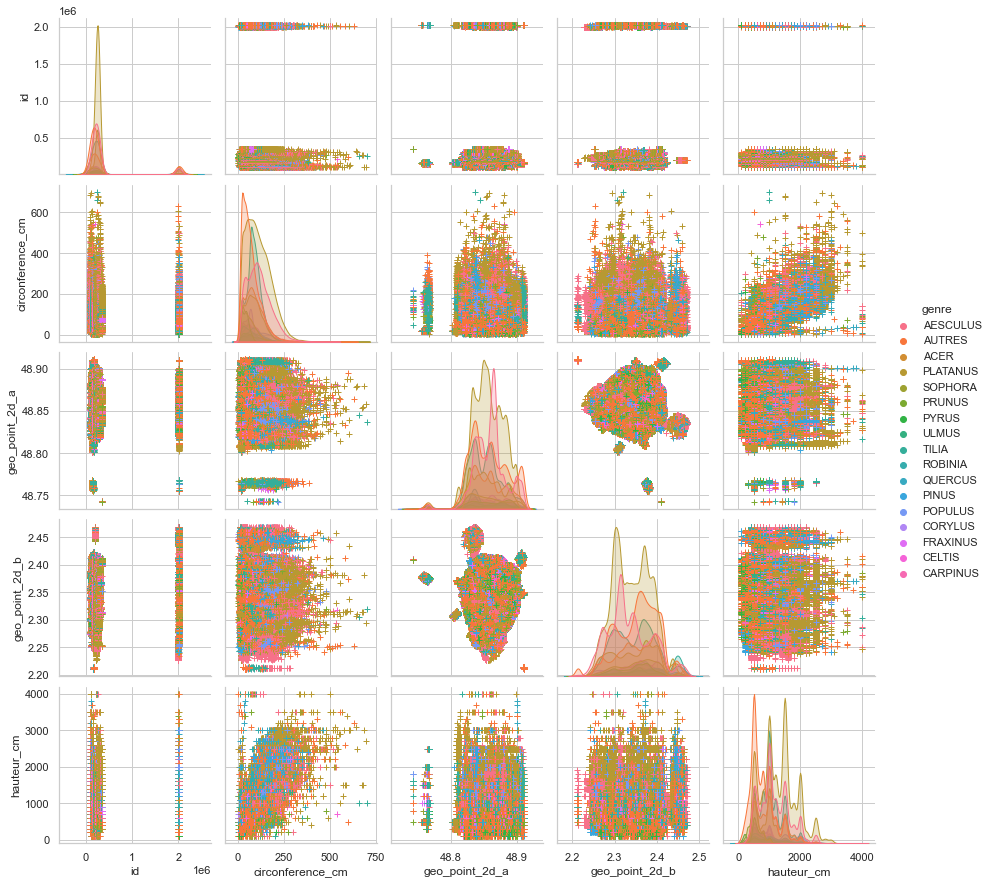

In [468]:
sns.pairplot(data, hue="genre" , plot_kws=dict(marker="+", linewidth=1))